In [87]:
# David Aragón 21053
# Renatto Guzmán 21646
# Universidad del Valle de Guatemala
# Data Science

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [146]:

# Cargar los archivos CSV
consumo_df = pd.read_csv('Consumo.csv')
importacion_df = pd.read_csv('Importacion.csv')
precios_df = pd.read_csv('Precios.csv')

# Filtrar las columnas relevantes en cada DataFrame
consumo_df = consumo_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importacion_df = importacion_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
precios_df = precios_df[['FECHA', 'Regular', 'Superior', 'Diesel', 'Glp Cilindro 25Lbs.']]

# Renombrar columnas en precios_df para consistencia
precios_df.rename(columns={'FECHA': 'Fecha', 'Regular': 'Gasolina regular', 'Superior': 'Gasolina superior', 'Diesel': 'Diesel bajo azufre', 'Glp Cilindro 25Lbs.': 'Gas licuado de petróleo'}, inplace=True)

# Filtrar filas con fechas no válidas
consumo_df = consumo_df[consumo_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]
importacion_df = importacion_df[importacion_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]
precios_df = precios_df[precios_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]

# Convertir la columna 'Fecha' a datetime
consumo_df['Fecha'] = pd.to_datetime(consumo_df['Fecha'], errors='coerce')
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')
precios_df['Fecha'] = pd.to_datetime(precios_df['Fecha'], errors='coerce')

# Eliminar filas donde 'Fecha' sea NaT (si es necesario)
consumo_df = consumo_df.dropna(subset=['Fecha'])
importacion_df = importacion_df.dropna(subset=['Fecha'])
precios_df = precios_df.dropna(subset=['Fecha'])

In [147]:

consumo_copy = consumo_df[consumo_df['Fecha'].dt.year >= 2021].copy()


In [116]:
# Verificar los resultados
print("Rango de fechas en consumo_df:")
print(consumo_df['Fecha'].min(), "-", consumo_df['Fecha'].max())

print("\nRango de fechas en consumo_24:")
print(consumo_24['Fecha'].min(), "-", consumo_24['Fecha'].max())


Rango de fechas en consumo_df:
2000-01-01 00:00:00 - 2023-12-01 00:00:00

Rango de fechas en consumo_24:
2024-01-01 00:00:00 - 2024-05-01 00:00:00


# Laboratorio 3 de Data Science

In [124]:
# Función para crear secuencias de datos
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps), :])
        y.append(data[i + n_steps, :])
    return np.array(X), np.array(y)

serie de consumo

In [125]:
scaler = MinMaxScaler()
n_steps = 12

In [148]:

consumo_df.set_index('Fecha', inplace=True)

# Seleccionamos las columnas numéricas
consumo_data = consumo_df.select_dtypes(include=[np.number])

# Normalizamos los datos
consumo_scaled_data = scaler.fit_transform(consumo_data)

X, y = create_sequences(consumo_scaled_data, n_steps)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Construir el modelo LSTM
def build_lstm_model(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(n_features))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

n_features = X.shape[2]
model_consumo = build_lstm_model(n_steps, n_features)

# Entrenar el modelo

history1 = model_consumo.fit(X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    verbose=2
)


Epoch 1/300


C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 1s - 245ms/step - accuracy: 0.2386 - loss: 0.1527 - val_accuracy: 0.2273 - val_loss: 0.1861
Epoch 2/300
6/6 - 0s - 13ms/step - accuracy: 0.2386 - loss: 0.1184 - val_accuracy: 0.2273 - val_loss: 0.1381
Epoch 3/300
6/6 - 0s - 11ms/step - accuracy: 0.2386 - loss: 0.0817 - val_accuracy: 0.2273 - val_loss: 0.0814
Epoch 4/300
6/6 - 0s - 11ms/step - accuracy: 0.2386 - loss: 0.0407 - val_accuracy: 0.2273 - val_loss: 0.0339
Epoch 5/300
6/6 - 0s - 11ms/step - accuracy: 0.3409 - loss: 0.0236 - val_accuracy: 0.4773 - val_loss: 0.0205
Epoch 6/300
6/6 - 0s - 11ms/step - accuracy: 0.5739 - loss: 0.0153 - val_accuracy: 0.5682 - val_loss: 0.0150
Epoch 7/300
6/6 - 0s - 10ms/step - accuracy: 0.5795 - loss: 0.0138 - val_accuracy: 0.5909 - val_loss: 0.0158
Epoch 8/300
6/6 - 0s - 11ms/step - accuracy: 0.6307 - loss: 0.0122 - val_accuracy: 0.5455 - val_loss: 0.0119
Epoch 9/300
6/6 - 0s - 12ms/step - accuracy: 0.5568 - loss: 0.0109 - val_accuracy: 0.4773 - val_loss: 0.0098
Epoch 10/300
6/6 - 0s - 11ms/s

In [96]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [97]:


def build_lstm_model2(n_steps, n_features):
    model = Sequential([
        LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
        Dense(n_features),
        LSTM(100, activation='relu', return_sequences=True),
        Dense(n_features),
        LSTM(50, activation='relu'),
        Dense(n_features)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])
    return model

lr_reducer = ReduceLROnPlateau(factor=0.5, patience=10)
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)


n_features = X.shape[2]

model_consumo2 = build_lstm_model2(n_steps, n_features)

# Entrenamos el modelo
history2 = model_consumo2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=32,
    verbose=2,
    callbacks=[lr_reducer, early_stopping]

)


Epoch 1/300
7/7 - 4s - 570ms/step - accuracy: 0.4727 - loss: 0.1728 - val_accuracy: 0.6250 - val_loss: 0.1242 - learning_rate: 0.0010
Epoch 2/300
7/7 - 0s - 33ms/step - accuracy: 0.5409 - loss: 0.1391 - val_accuracy: 0.6250 - val_loss: 0.0796 - learning_rate: 0.0010
Epoch 3/300
7/7 - 0s - 19ms/step - accuracy: 0.5409 - loss: 0.0704 - val_accuracy: 0.6250 - val_loss: 0.0384 - learning_rate: 0.0010
Epoch 4/300
7/7 - 0s - 21ms/step - accuracy: 0.5409 - loss: 0.0291 - val_accuracy: 0.6250 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 5/300
7/7 - 0s - 20ms/step - accuracy: 0.3773 - loss: 0.0222 - val_accuracy: 0.1786 - val_loss: 0.0271 - learning_rate: 0.0010
Epoch 6/300
7/7 - 0s - 20ms/step - accuracy: 0.2955 - loss: 0.0193 - val_accuracy: 0.5357 - val_loss: 0.0199 - learning_rate: 0.0010
Epoch 7/300
7/7 - 0s - 18ms/step - accuracy: 0.5500 - loss: 0.0149 - val_accuracy: 0.6071 - val_loss: 0.0181 - learning_rate: 0.0010
Epoch 8/300
7/7 - 0s - 19ms/step - accuracy: 0.5864 - loss: 0.0134 -

In [98]:
def evaluate_models(model1, model2, X_test, y_test):
    scores1 = model1.evaluate(X_test, y_test, verbose=0)
    scores2 = model2.evaluate(X_test, y_test, verbose=0)
    print(f"Model 1 Test Accuracy: {scores1[1]:.4f}, Test Loss: {scores1[0]:.4f}")
    print(f"Model 2 Test Accuracy: {scores2[1]:.4f}, Test Loss: {scores2[0]:.4f}")

evaluate_models(model_consumo, model_consumo2, X_test, y_test)


Model 1 Test Accuracy: 0.6607, Test Loss: 0.0062
Model 2 Test Accuracy: 0.6607, Test Loss: 0.0084


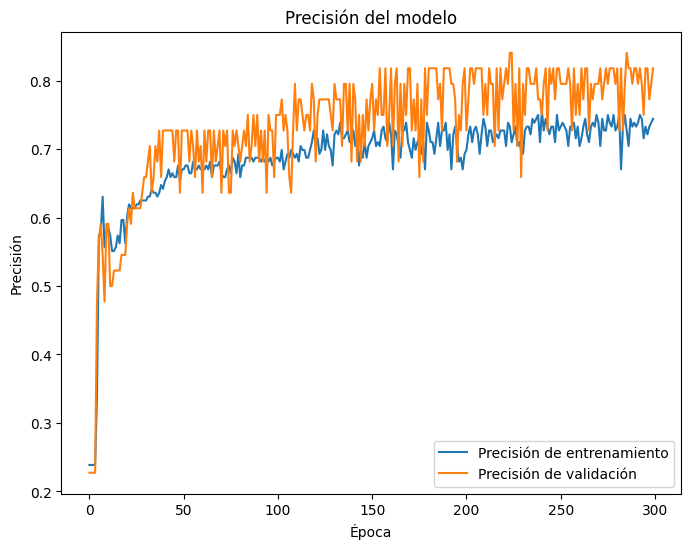

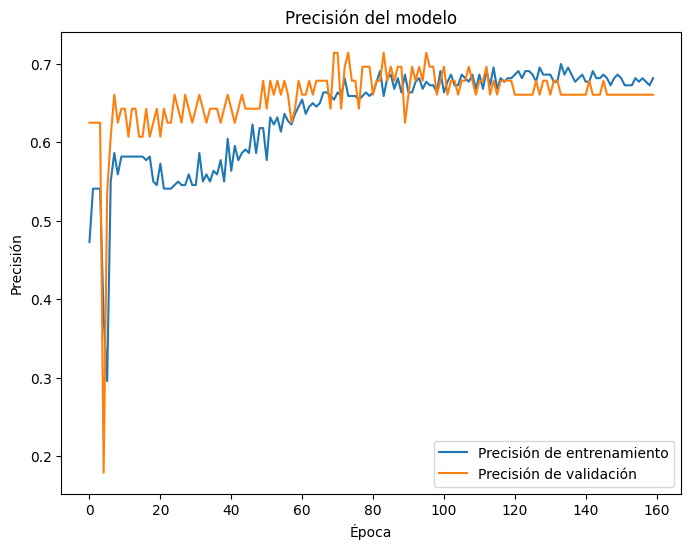

In [99]:
def plot_accuracy(history1, history2):
    plt.figure(figsize=[8,6])
    plt.plot(history1.history['accuracy'], label='Precisión de entrenamiento')
    plt.plot(history1.history['val_accuracy'], label='Precisión de validación')
    plt.title('Precisión del modelo')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()


    plt.figure(figsize=[8,6])
    plt.plot(history2.history['accuracy'], label='Precisión de entrenamiento')
    plt.plot(history2.history['val_accuracy'], label='Precisión de validación')
    plt.title('Precisión del modelo')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()

plot_accuracy(history1, history2)

Serie de importacion

In [100]:

importacion_df.set_index('Fecha', inplace=True)

# Seleccionamos las columnas numéricas
importacion_data = importacion_df.select_dtypes(include=[np.number])

# Normalizamos los datos
importacion_scaled_data = scaler.fit_transform(importacion_data)

X_i, y_i = create_sequences(importacion_scaled_data, n_steps)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_i, test_size=0.2, random_state=42)



In [101]:

n_features = X_i.shape[2]
model_importacion = build_lstm_model(n_steps, n_features)

# Entrenar el modelo

history1_i = model_importacion.fit(X_train_i, y_train_i,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    verbose=2
)


Epoch 1/300


C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 1s - 244ms/step - accuracy: 0.1512 - loss: 0.1689 - val_accuracy: 0.2326 - val_loss: 0.1745
Epoch 2/300
6/6 - 0s - 13ms/step - accuracy: 0.1977 - loss: 0.1308 - val_accuracy: 0.3488 - val_loss: 0.1314
Epoch 3/300
6/6 - 0s - 11ms/step - accuracy: 0.2035 - loss: 0.0932 - val_accuracy: 0.3488 - val_loss: 0.0852
Epoch 4/300
6/6 - 0s - 11ms/step - accuracy: 0.2035 - loss: 0.0539 - val_accuracy: 0.3488 - val_loss: 0.0383
Epoch 5/300
6/6 - 0s - 11ms/step - accuracy: 0.2035 - loss: 0.0269 - val_accuracy: 0.3488 - val_loss: 0.0285
Epoch 6/300
6/6 - 0s - 10ms/step - accuracy: 0.3314 - loss: 0.0207 - val_accuracy: 0.3256 - val_loss: 0.0200
Epoch 7/300
6/6 - 0s - 11ms/step - accuracy: 0.4070 - loss: 0.0164 - val_accuracy: 0.3488 - val_loss: 0.0205
Epoch 8/300
6/6 - 0s - 10ms/step - accuracy: 0.4128 - loss: 0.0157 - val_accuracy: 0.3953 - val_loss: 0.0176
Epoch 9/300
6/6 - 0s - 12ms/step - accuracy: 0.3953 - loss: 0.0136 - val_accuracy: 0.4884 - val_loss: 0.0161
Epoch 10/300
6/6 - 0s - 14ms/s

In [102]:
n_features = X_i.shape[2]
model_importacion2 = build_lstm_model2(n_steps, n_features)

# Entrenar el modelo

history2_i = model_importacion2.fit(X_train_i, y_train_i,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    verbose=2
)


Epoch 1/300
6/6 - 5s - 807ms/step - accuracy: 0.2267 - loss: 0.1472 - val_accuracy: 0.3488 - val_loss: 0.1669
Epoch 2/300
6/6 - 0s - 21ms/step - accuracy: 0.2035 - loss: 0.1320 - val_accuracy: 0.3488 - val_loss: 0.1416
Epoch 3/300
6/6 - 0s - 22ms/step - accuracy: 0.2035 - loss: 0.1026 - val_accuracy: 0.3488 - val_loss: 0.0769
Epoch 4/300
6/6 - 0s - 22ms/step - accuracy: 0.2035 - loss: 0.0451 - val_accuracy: 0.3488 - val_loss: 0.0304
Epoch 5/300
6/6 - 0s - 21ms/step - accuracy: 0.2093 - loss: 0.0296 - val_accuracy: 0.4651 - val_loss: 0.0463
Epoch 6/300
6/6 - 0s - 20ms/step - accuracy: 0.3547 - loss: 0.0350 - val_accuracy: 0.5116 - val_loss: 0.0348
Epoch 7/300
6/6 - 0s - 20ms/step - accuracy: 0.2907 - loss: 0.0265 - val_accuracy: 0.3256 - val_loss: 0.0316
Epoch 8/300
6/6 - 0s - 23ms/step - accuracy: 0.1977 - loss: 0.0251 - val_accuracy: 0.3488 - val_loss: 0.0264
Epoch 9/300
6/6 - 0s - 23ms/step - accuracy: 0.2384 - loss: 0.0220 - val_accuracy: 0.4186 - val_loss: 0.0233
Epoch 10/300
6/6 -

Model 1 Test Accuracy: 0.4444, Test Loss: 0.0141
Model 2 Test Accuracy: 0.4074, Test Loss: 0.0177


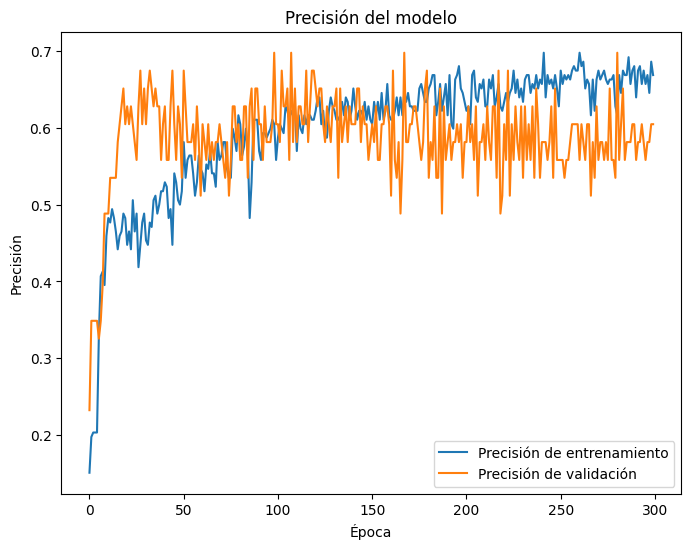

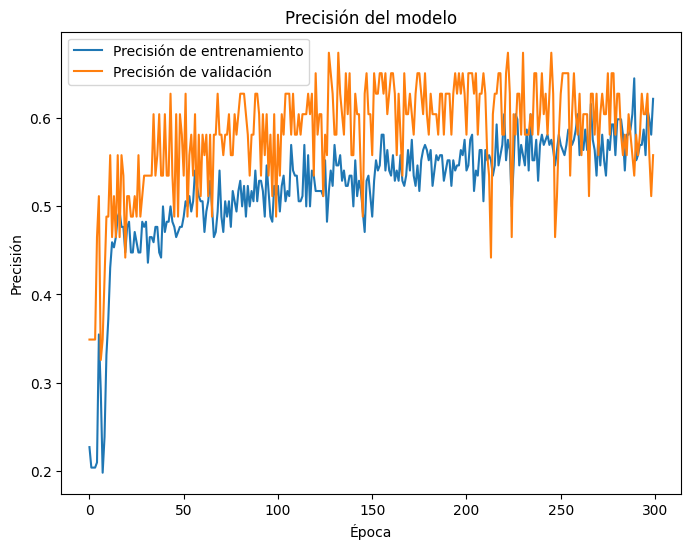

In [103]:
evaluate_models(model_importacion, model_importacion2, X_test_i, y_test_i)

plot_accuracy(history1_i, history2_i)

Serie de precios

In [104]:

precios_df.set_index('Fecha', inplace=True)

# Seleccionamos las columnas numéricas
precios_data = precios_df.select_dtypes(include=[np.number])

# Normalizamos los datos
precios_scaled_data = scaler.fit_transform(precios_data)

X_p, y_p = create_sequences(precios_scaled_data, n_steps)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)



In [105]:

n_features = X_p.shape[2]
model_precios = build_lstm_model(n_steps, n_features)

# Entrenar el modelo

history1_p = model_precios.fit(X_train_p, y_train_p,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    verbose=2
)


Epoch 1/300


C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 - 2s - 59ms/step - accuracy: 0.2933 - loss: 0.1269 - val_accuracy: 0.2464 - val_loss: 0.0187
Epoch 2/300
26/26 - 0s - 6ms/step - accuracy: 0.3152 - loss: 0.0155 - val_accuracy: 0.6812 - val_loss: 0.0111
Epoch 3/300
26/26 - 0s - 6ms/step - accuracy: 0.7200 - loss: 0.0086 - val_accuracy: 0.7343 - val_loss: 0.0071
Epoch 4/300
26/26 - 0s - 6ms/step - accuracy: 0.7636 - loss: 0.0053 - val_accuracy: 0.7826 - val_loss: 0.0050
Epoch 5/300
26/26 - 0s - 6ms/step - accuracy: 0.7782 - loss: 0.0040 - val_accuracy: 0.7778 - val_loss: 0.0043
Epoch 6/300
26/26 - 0s - 5ms/step - accuracy: 0.8085 - loss: 0.0034 - val_accuracy: 0.8599 - val_loss: 0.0036
Epoch 7/300
26/26 - 0s - 8ms/step - accuracy: 0.8424 - loss: 0.0031 - val_accuracy: 0.8599 - val_loss: 0.0036
Epoch 8/300
26/26 - 0s - 7ms/step - accuracy: 0.8473 - loss: 0.0030 - val_accuracy: 0.8599 - val_loss: 0.0035
Epoch 9/300
26/26 - 0s - 6ms/step - accuracy: 0.8545 - loss: 0.0028 - val_accuracy: 0.8309 - val_loss: 0.0030
Epoch 10/300
26/26 - 

In [106]:

n_features = X_p.shape[2]
model_precios2 = build_lstm_model2(n_steps, n_features)

# Entrenar el modelo

history2_p = model_precios2.fit(X_train_p, y_train_p,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    verbose=2
)


Epoch 1/300
26/26 - 5s - 186ms/step - accuracy: 0.3273 - loss: 0.1699 - val_accuracy: 0.1401 - val_loss: 0.0242
Epoch 2/300
26/26 - 1s - 22ms/step - accuracy: 0.2909 - loss: 0.0222 - val_accuracy: 0.2464 - val_loss: 0.0196
Epoch 3/300
26/26 - 1s - 22ms/step - accuracy: 0.3321 - loss: 0.0163 - val_accuracy: 0.2850 - val_loss: 0.0169
Epoch 4/300
26/26 - 1s - 22ms/step - accuracy: 0.3842 - loss: 0.0145 - val_accuracy: 0.5314 - val_loss: 0.0159
Epoch 5/300
26/26 - 1s - 20ms/step - accuracy: 0.5321 - loss: 0.0139 - val_accuracy: 0.4976 - val_loss: 0.0147
Epoch 6/300
26/26 - 1s - 22ms/step - accuracy: 0.5576 - loss: 0.0129 - val_accuracy: 0.5507 - val_loss: 0.0139
Epoch 7/300
26/26 - 1s - 21ms/step - accuracy: 0.6061 - loss: 0.0121 - val_accuracy: 0.5797 - val_loss: 0.0127
Epoch 8/300
26/26 - 1s - 21ms/step - accuracy: 0.6327 - loss: 0.0108 - val_accuracy: 0.6522 - val_loss: 0.0113
Epoch 9/300
26/26 - 0s - 18ms/step - accuracy: 0.6836 - loss: 0.0089 - val_accuracy: 0.7053 - val_loss: 0.0097


Model 1 Test Accuracy: 0.9380, Test Loss: 0.0007
Model 2 Test Accuracy: 0.9264, Test Loss: 0.0009


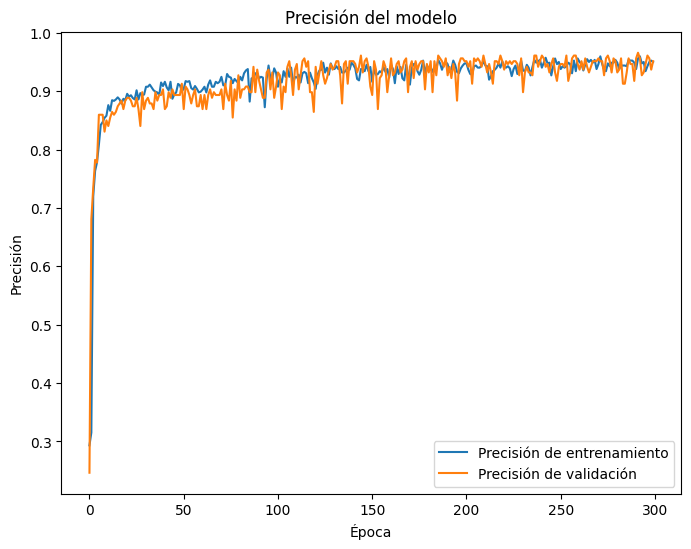

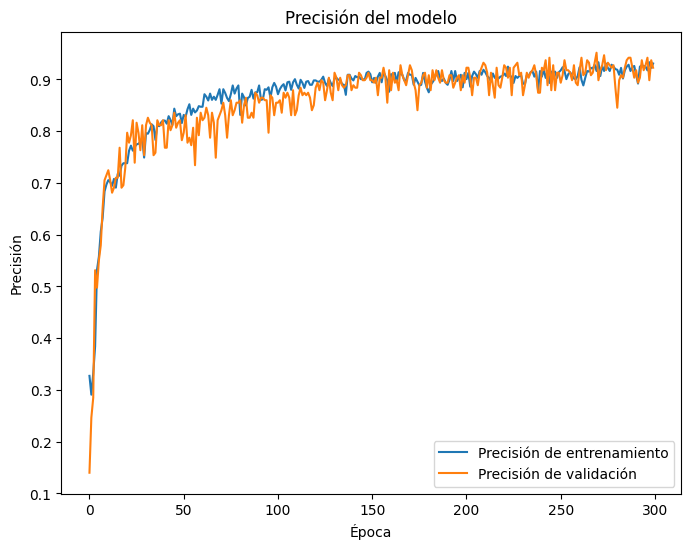

In [107]:
evaluate_models(model_precios, model_precios2, X_test_p, y_test_p)

plot_accuracy(history1_p, history2_p)

## Predicciones de consumo para 2024

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

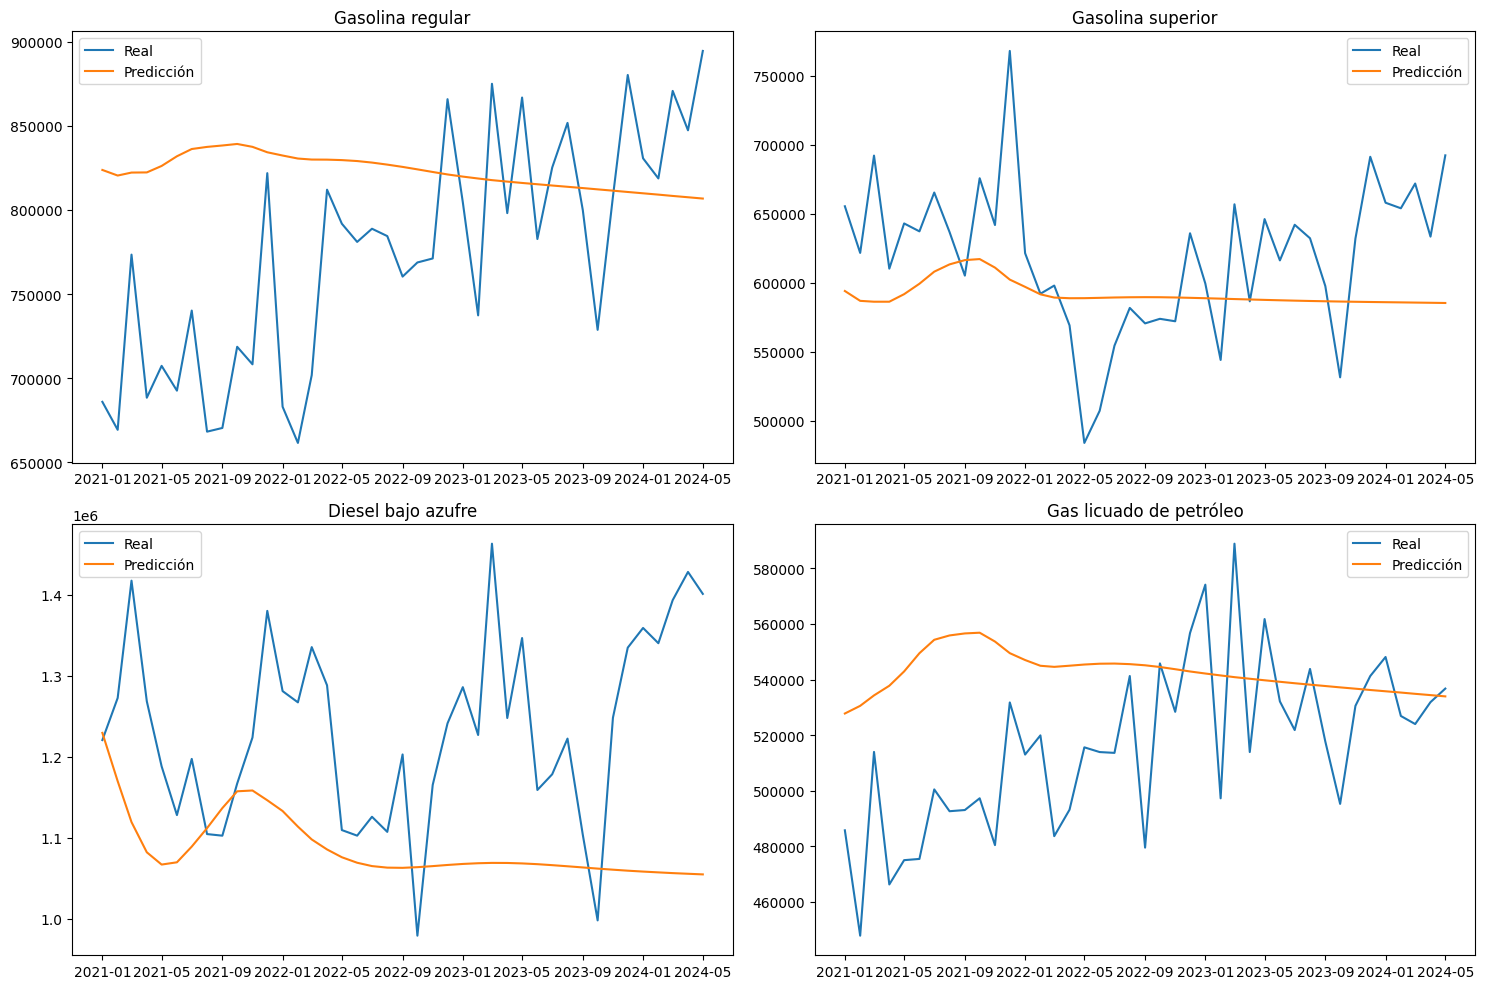

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Preparar los datos de 2023 para la predicción
last_sequence = consumo_df.iloc[-n_steps:].values
last_sequence_scaled = scaler.transform(last_sequence)
last_sequence_reshaped = last_sequence_scaled.reshape((1, n_steps, n_features))

# Predecir para cada mes de 2024
predictions = []
for _ in range(len(consumo_copy)):
    next_pred = model_consumo.predict(last_sequence_reshaped)
    predictions.append(next_pred[0])
    last_sequence_reshaped = np.roll(last_sequence_reshaped, -1, axis=1)
    last_sequence_reshaped[0, -1, :] = next_pred

# Convertir predicciones a DataFrame
predictions_scaled = np.array(predictions).reshape(-1, n_features)
predictions_df = pd.DataFrame(scaler.inverse_transform(predictions_scaled), 
                              columns=consumo_copy.columns[1:], 
                              index=consumo_copy['Fecha'])

# Calcular errores
mse = mean_squared_error(consumo_copy.iloc[:, 1:], predictions_df)
mae = mean_absolute_error(consumo_copy.iloc[:, 1:], predictions_df)

print(f"Error Cuadrático Medio: {mse}")
print(f"Error Absoluto Medio: {mae}")

# Graficar predicciones vs valores reales
plt.figure(figsize=(15, 10))
for i, col in enumerate(consumo_copy.columns[1:]):
    plt.subplot(2, 2, i+1)
    plt.plot(consumo_copy['Fecha'], consumo_copy[col], label='Real')
    plt.plot(predictions_df.index, predictions_df[col], label='Predicción')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

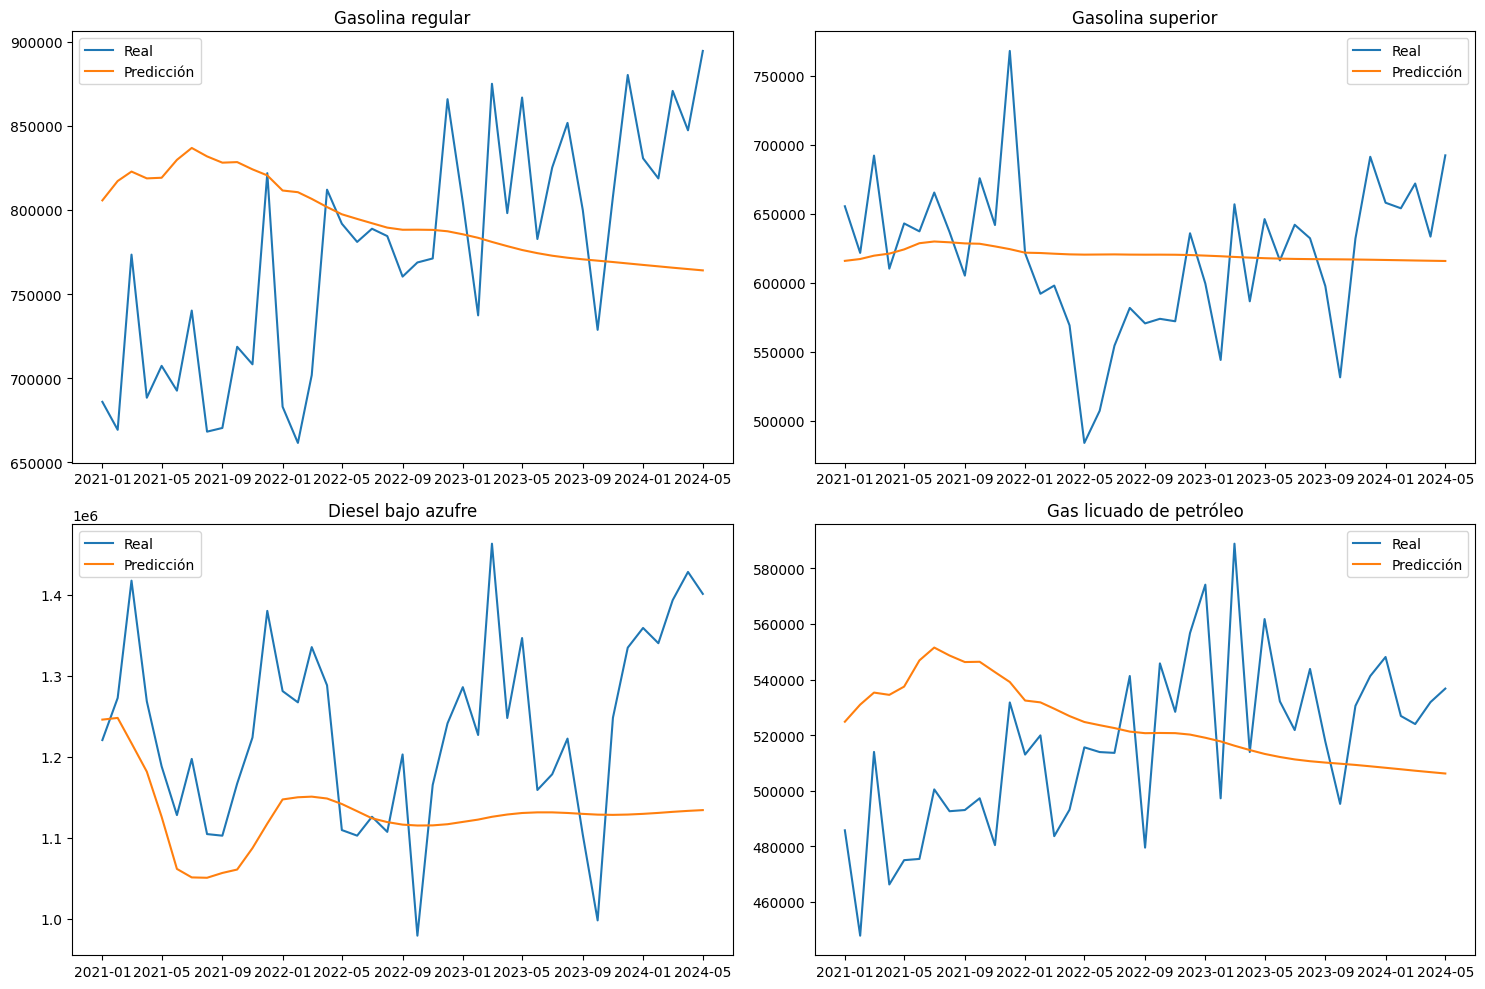

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Asumimos que ya tienes el modelo entrenado llamado model_consumo
# y que los datos están normalizados con un scaler

# Preparar los datos de 2023 para la predicción
last_sequence = consumo_df.iloc[-n_steps:].values
last_sequence_scaled = scaler.transform(last_sequence)
last_sequence_reshaped = last_sequence_scaled.reshape((1, n_steps, n_features))

# Predecir para cada mes de 2024
predictions = []
for _ in range(len(consumo_copy)):
    next_pred = model_consumo2.predict(last_sequence_reshaped)
    predictions.append(next_pred[0])
    last_sequence_reshaped = np.roll(last_sequence_reshaped, -1, axis=1)
    last_sequence_reshaped[0, -1, :] = next_pred

# Convertir predicciones a DataFrame
predictions_scaled = np.array(predictions).reshape(-1, n_features)
predictions_df = pd.DataFrame(scaler.inverse_transform(predictions_scaled), 
                              columns=consumo_copy.columns[1:], 
                              index=consumo_copy["Fecha"])

# Calcular errores
mse = mean_squared_error(consumo_copy.iloc[:, 1:], predictions_df)
mae = mean_absolute_error(consumo_copy.iloc[:, 1:], predictions_df)

print(f"Error Cuadrático Medio: {mse}")
print(f"Error Absoluto Medio: {mae}")

# Graficar predicciones vs valores reales
plt.figure(figsize=(15, 10))
for i, col in enumerate(consumo_copy.columns[1:]):
    plt.subplot(2, 2, i+1)
    plt.plot(consumo_copy['Fecha'], consumo_copy[col], label='Real')
    plt.plot(predictions_df.index, predictions_df[col], label='Predicción')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()
